C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_12300\1482345306.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')


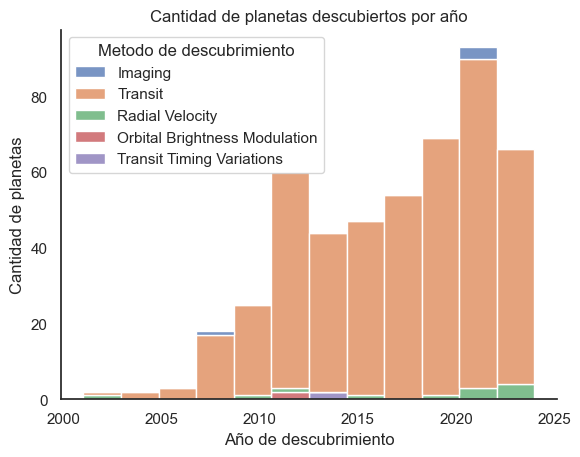

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')
# Dejar solo planeta confirmados, metodo deteccion, nombre planeta, periodo orbital, año de descubrimiento, masa y radio del planeta tierra
col_list = ['pl_name', 'discoverymethod', 'disc_year','pl_orbper','soltype', 'pl_rade','pl_masse','st_mass']
df = df[col_list]
# Traducir nombres de columnas
df.columns = ['Nombre', 'Metodo de descubrimiento', 'Año', 'Periodo Orbital', 'Tipo Estrella', 'Radio Planeta', 'Masa Planeta', 'Masa Estrella']
# Crear mi estilo de graficos
sns.set_theme(style='white')
# Quitar eje superior y derecho
sns.set(style='white', rc={'axes.spines.right': False, 'axes.spines.top': False})

# Dejar planetas confirmados unicos
df_filter = df.drop_duplicates(subset=['Nombre'])
# Drop filas con valores nulos
df_filter = df_filter.dropna()
# Dropear columna pl_name
df_filter = df_filter.drop(columns=['Nombre'])
# Hacer histograma de años disc_year vs metodos de descubrimiento discoverymethod
sns.histplot(data=df_filter, x='Año', hue='Metodo de descubrimiento', multiple='stack')
# Traducir al español
plt.xlabel('Año de descubrimiento')
plt.ylabel('Cantidad de planetas')
plt.title('Cantidad de planetas descubiertos por año')
plt.show()





Text(0.5, 0, 'Cantidad de planetas')

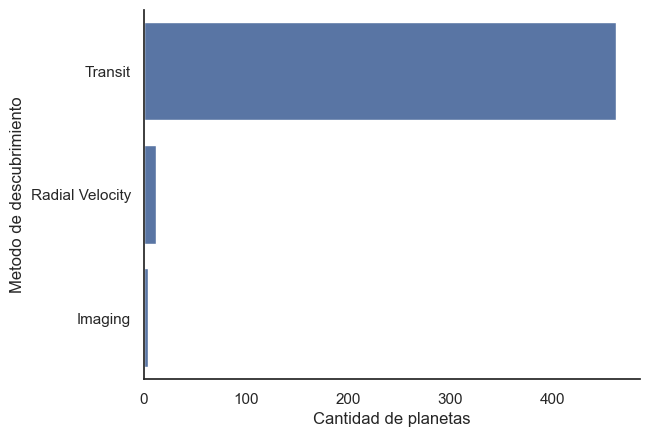

In [21]:
# Cuales son las 3 tecnicas de descubrimiento mas comunes
comunes_3 = df_filter['Metodo de descubrimiento'].value_counts().head(3)
# Gráfico de barras de las 3 tecnicas de descubrimiento mas comunes, en el eje x tiene que estar desde el  0 hasta el 80
sns.countplot(data=df_filter, y='Metodo de descubrimiento', order=comunes_3.index)
plt.xlabel('Cantidad de planetas')

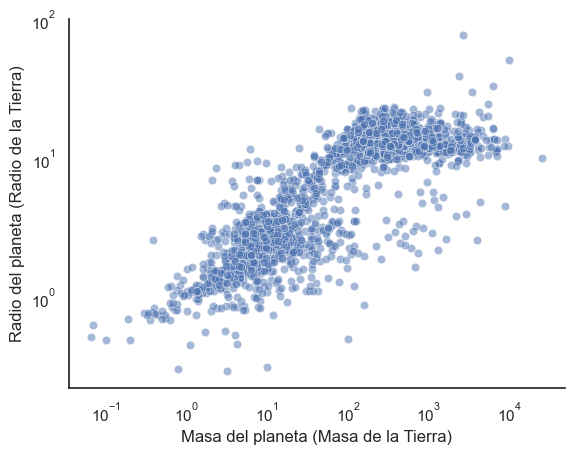

In [22]:
# Existe una relacion entre la masa del planeta y el radio del planeta?
# Incluir incertezas de cada valor
# Hacer un scatter plot con los valores de masa y radio
plt.figure()
sns.scatterplot(data=df, x='Masa Planeta', y='Radio Planeta', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masa del planeta (Masa de la Tierra)')
plt.ylabel('Radio del planeta (Radio de la Tierra)')
plt.show()


In [23]:
# Calcular la correlacion entre masa y radio
correlation = df['Masa Planeta'].corr(df['Radio Planeta'])
print(correlation)

0.3071838760716857


In [24]:
# 3 Indicadores
# Realice un breve informe maximo de 5 